(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarke

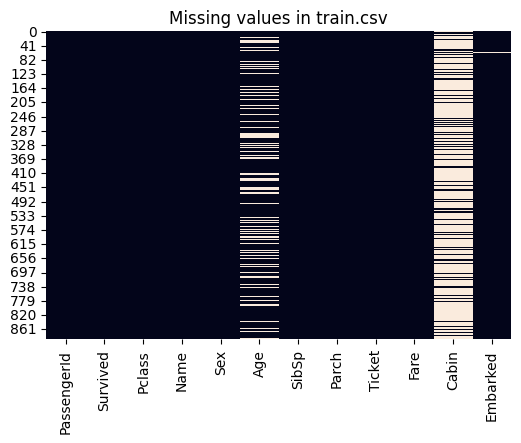

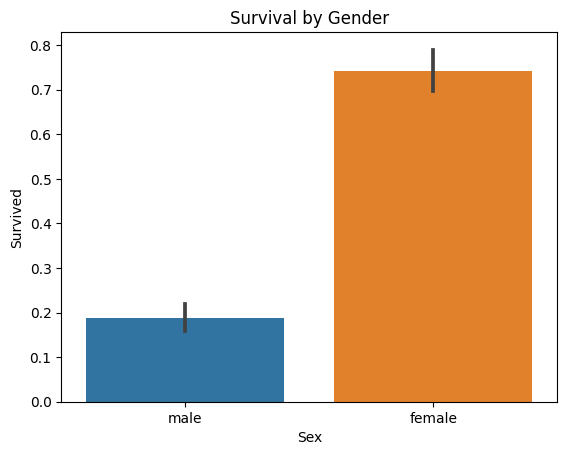

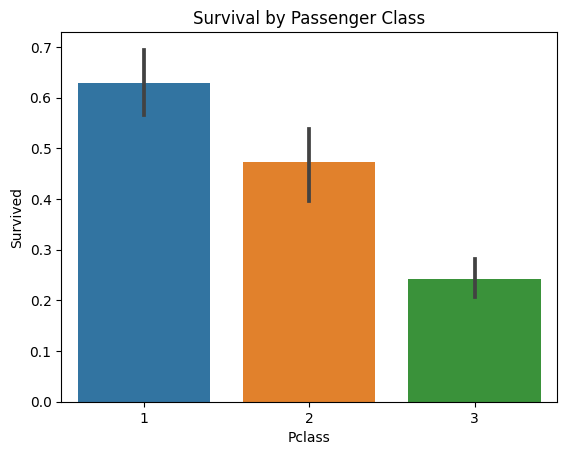

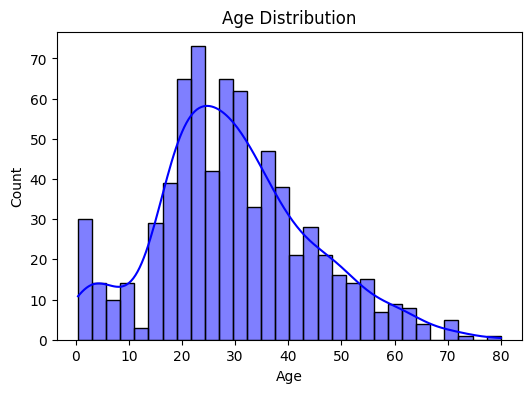

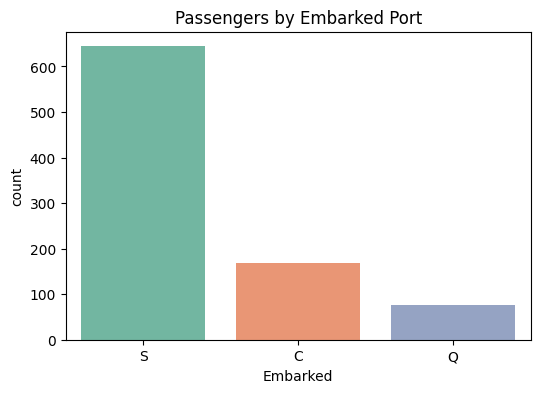

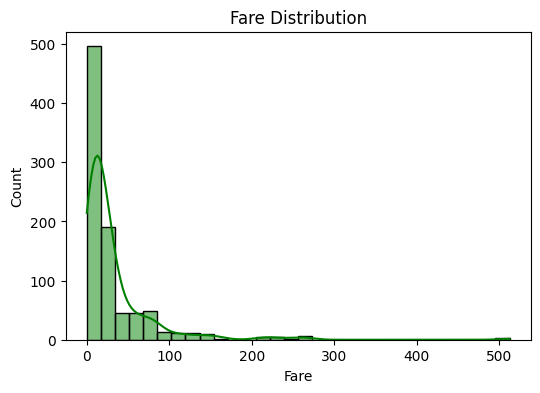

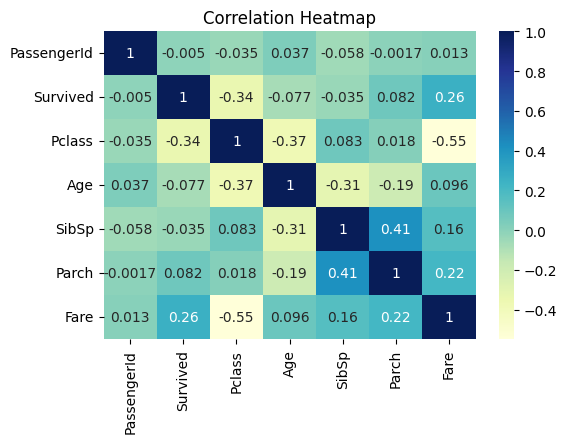

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# Load datasets
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Preview
print(train.shape)
train.head()

train.info()
print("\nMissing values:\n", train.isnull().sum())

plt.figure(figsize=(6,4))
sns.heatmap(train.isnull(), cbar=False)
plt.title("Missing values in train.csv")
plt.show()


sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival by Gender")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df, palette="Set2")
plt.title("Passengers by Embarked Port")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title("Fare Distribution")
plt.show()


plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()




In [8]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load train and test datasets
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

# Fill missing values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# Convert categorical variables
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked"], drop_first=True)

# Select features and target
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]
X = train_df[features]
y = train_df["Survived"]

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions on test data
X_test = test_df[features]
predictions = model.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv")

Submission file saved as submission.csv
